# 金庸的武俠世界

金庸老爺子一共寫了15部武俠小說，它們分別是：

- 《飛狐外傳》（1960年）
- 《雪山飛狐》（1959年）
- 《連城訣》（1963年）
- 《天龍八部》（1963年）
- 《射鵰英雄傳》（1957年）
- 《白馬嘯西風》（1961年）
- 《鹿鼎記》（1969年）
- 《笑傲江湖》（1967年）
- 《書劍恩仇錄》（1955年）
- 《神鵰俠侶》（1959年）
- 《俠客行》（1965年）
- 《倚天屠龍記》（1961年）
- 《碧血劍》（1956年）
- 《鴛鴦刀》（1961年）
- 《越女劍》（1970年）

我們現在就用 `Python` 來探索一下金庸小說中的武俠世界吧。

## 準備工作

再處理小說之前，我們需要先做一些準備工作。

因為涉及中文字元，所以我們使用 `__future__` 中 Python 3 的特性，將所有的字元串轉為 `unicode`。

In [1]:
from __future__ import unicode_literals

再來我們解決圖像裡中文字元顯示的問題，Matplotlib雖然支持 `unicode` 編碼，但是直接輸出中文字型會出現問題。

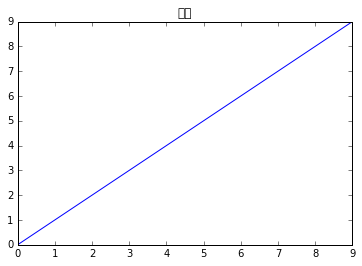

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

x = range(10)
plt.plot(x)
plt.title("中文")
plt.show()

出現上圖的原因是它找不到合適的中文字型去顯示中文，為此，我們可以去尋找一些支持中文的字型來進行設置。

`Windows 7` 及以上的系統中，字型位置為 `C:/Windows/Fonts`，例如：
- 宋體：`C:/Windows/Fonts/simsun.ttc`

`Linux` 系統可以通過 `fc-list` 命令查看已有的字型和相應的位置，例如：
- `/usr/share/fonts/truetype/osx-font-family/Songti.ttc: Songti TC,宋體\-繁,宋體\-繁:style=Bold,粗體,粗體`
- `/usr/share/fonts/truetype/osx-font-family/Devanagari Sangam MN.ttc: Devanagari Sangam MN,देवनागरी संगम एम॰एन॰:style=Bold,粗體,Fed,Fett,Puolilihava,Gras,Grassetto,ボールド,볼드체,Vet,Fet,Negrito,Жирный,बोल्ड,粗體,Negrita`
- `/usr/share/fonts/truetype/osx-font-family/Iowan Old Style.ttc: Iowan Old Style,Iowan Old Style Black:style=Black Italic,Italic`

也可以從網上直接下載字型
- 比如 `Yahei Consolas` 的字型 `YaHei.Consolas.1.11b.ttf`。

找到了字型的位置，我們可以使用 `matplotlib.font_manager` 中的 `FontProperties` 導入字型：

    font_xxx = FontProperties(fname="/usr/share/fonts/truetype/osx-font-family/Songti.ttc")
    font_xxx = FontProperties(fname="C://Windows//Fonts//simsun.ttc")

為了方便，我們不使用字型的絶對路徑導入，而是將需要的字型放在程序對應的檔案夾下：

- `simsum.ttc`
- `YaHei.Consolas.1.11b.ttf`

In [3]:
from matplotlib.font_manager import FontProperties

font_simsum = FontProperties(fname="simsun.ttc")
font_yahei_consolas = FontProperties(fname="YaHei.Consolas.1.11b.ttf")

在繪圖的時候進行設置：

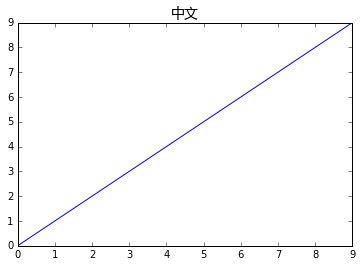

In [4]:
x = range(10)
plt.plot(x)
plt.title("中文", fontproperties=font_yahei_consolas, fontsize=14)
plt.show()

## 小說概覽

我們從網上找到金庸小說的 txt 全文，放在 `novels` 檔案夾中：

In [5]:
!ls novels

書劍恩仇錄.txt	天龍八部.txt	碧血劍.txt    越女劍.txt    飛狐外傳.txt
俠客行.txt	射鵰英雄傳.txt	神鵰俠侶.txt  連城訣.txt    鴛鴦刀.txt
倚天屠龍記.txt	白馬嘯西風.txt	笑傲江湖.txt  雪山飛狐.txt  鹿鼎記.txt


先一睹為快：

In [6]:
with open('novels/鴛鴦刀.txt') as f:
    # 去掉結尾的換行符
    data = [line.strip().decode('utf8') for line in f.readlines()]

for line in data[:13]:
    if line.strip():
        print line

﻿
　　鴛鴦刀
　　四個勁裝結束的漢子並肩而立，攔在當路！
　　若是黑道上山寨的強人，不會只有四個，莫非在這黑沉沉的松林之中，暗中還埋伏下大批人手？如是剪徑的小賊，見了這麼聲勢浩大的鏢隊，遠避之唯恐不及，哪敢這般大模大樣的攔路擋道？難道竟是武林高手，衝著自己而來？
　　凝神打量四人：最左一人短小精悍，下巴尖削，手中拿着一對峨嵋鋼刺。第二個又高又肥，便如是一座鐵塔擺在地下，身前放著一塊大石碑，碑上寫的是“先考黃府君誠本之墓”，這自是一塊墓碑了，不知放在身前有何用意？黃誠本？沒聽說江湖上有這麼一位前輩高手啊！第三個中等身材，白淨臉皮，若不是一副牙齒向外凸出了一寸，一個鼻頭低陷了半寸，倒算得上是一位相貌英俊的人物，他手中拿的是一對流星錘。最右邊的是個病夫模樣的中年人，衣衫襤褸，咬着一根旱煙管，雙目似睜似閉，嘴裡慢慢噴着煙霧，竟是沒將這一隊七十來人的鏢隊瞧在眼裡。
　　那三人倒還罷了，這病夫定是個內功深湛的勁敵。頃刻之間，江湖上許多軼聞往事湧上了心頭：一個白髮婆婆空手殺死了五名鏢頭，劫走了一支大鏢；一個老乞丐大閙太原府公堂，割去了知府的首級，倏然間不知去向；一個美貌大姑娘打倒了晉北大同府享名二十餘年的張大拳師……越是貌不驚人、滿不在乎的人物，越是武功了得，江湖上有言道：“真人不露相，露相不真人。”
　　瞧著這個閉目抽菸的病夫，陝西西安府威信鏢局的總鏢頭、“鐵鞭鎮八方”周威信不由得深自躊躇起來，不由自主的伸手去摸了一摸背上的包袱。


## 出場人物

接着，我們先找到金庸小說中所有出場的人物，放到 names.txt 檔案中，其格式為：

```
小說1
人物1 人物2 ……
小說2
人物1 人物2 ……
小說3
人物1 人物2 ……
……
```

In [7]:
with open('names.txt') as f:
    # 去掉結尾的換行符
    data = [line.strip().decode('utf8') for line in f.readlines()]

novels = data[::2]
names = data[1::2]

novel_names = {k: v.split() for k, v in zip(novels, names)}

for name in novel_names['天龍八部'][:20]:
    print name

刀白鳳
丁春秋
馬夫人
馬五德
小翠
于光豪
巴天石
不平道人
鄧百川
風波惡
甘寶寶
公冶乾
木婉清
包不同
天狼子
太皇太后
王語嫣
烏老大
無崖子
雲島主


## 尋找主角光環

我們來看看人物在小說中的出場次數統計。

顯然出場次數越多，自然主角光環越強，我們定義一個函數尋找小說中主角光環最強的幾個人：

In [8]:
def find_main_charecters(novel, num=10):
    with open('novels/{}.txt'.format(novel)) as f:
        data = f.read().decode('utf8')
    count = []
    for name in novel_names[novel]:
        count.append([name, data.count(name)])
    count.sort(key=lambda x: x[1])
    _, ax = plt.subplots()
    
    numbers = [x[1] for x in count[-num:]]
    names = [x[0] for x in count[-num:]]
    ax.barh(range(num), numbers, color='red', align='center')
    ax.set_title(novel, fontsize=14, fontproperties=font_yahei_consolas)
    ax.set_yticks(range(num))
    ax.set_yticklabels(names, fontsize=14, fontproperties=font_yahei_consolas)

天龍八部：

In [9]:
find_main_charecters("天龍八部")

顯然，就《天龍八部》來說，蕭（喬）峰，段譽，虛竹這三兄弟的主角光環最強。

再看射鵰三部曲：

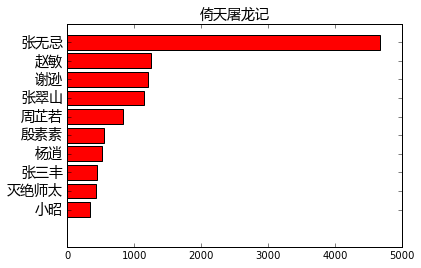

In [10]:
find_main_charecters("射鵰英雄傳")
find_main_charecters("神鵰俠侶")
find_main_charecters("倚天屠龍記")

## Word2Vec

接下來，我們將使用一些機器學習的觀點來處理這些小說。

`Word2Vec` 是一款將詞表徵為實數值向量的高效工具，原理就不過多介紹了，感興趣的可以自行搜索，

`gensim` 包提供了一個 `Python` 版的實現。

- 原始碼地址：https://github.com/RaRe-Technologies/gensim
- 官方文檔地址：http://radimrehurek.com/gensim/

首先安裝 `gensim`：

    pip install gensim
    
安裝完成之後，導入這個包：

In [11]:
import gensim

Using gpu device 1: Tesla C2075 (CNMeM is disabled, CuDNN not available)


## 中文分詞

雖然我們安裝了 `gensim`，但我們還不可以直接使用它來進行 `Word2Vec` 的操作，因為 `Word2Vec` 中的詞預設是用空格分隔的，而中文小說顯然不符合這個要求，為此，我們需要對中文進行分詞。

一個比較好用的 `Python` 中文分詞包叫做 `jieba` （結巴）。

- 原始碼地址：https://github.com/fxsjy/jieba

安裝 jieba：
    
    pip install jieba
    
導入：

In [12]:
import jieba

`jieba` 包具有識別新詞的能力，不過為了得到更準確的分詞結果，我們可以將人名導入 `jieba` 庫的字典，除此之外，我們還加入門派和武功的專有名詞：

In [13]:
for _, names in novel_names.iteritems():
    for name in names:
        jieba.add_word(name)
        
with open("kungfu.txt") as f:
    kungfu_names = [line.decode('utf8').strip() for line in f.readlines()]
    
with open("bangs.txt") as f:
    bang_names = [line.decode('utf8').strip() for line in f.readlines()]

for name in kungfu_names:
    jieba.add_word(name)

for name in bang_names:
    jieba.add_word(name)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
DEBUG:jieba:Loading model from cache /tmp/jieba.cache
Loading model cost 0.370 seconds.
DEBUG:jieba:Loading model cost 0.370 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


我們按照段落處理文本：

In [14]:
novels = ["書劍恩仇錄", 
          "天龍八部",
          "碧血劍",
          "越女劍",
          "飛狐外傳",
          "俠客行",
          "射鵰英雄傳",
          "神鵰俠侶",
          "連城訣",
          "鴛鴦刀",
          "倚天屠龍記",
          "白馬嘯西風",
          "笑傲江湖",
          "雪山飛狐",
          "鹿鼎記"]

sentences = []

for novel in novels:
    print "處理：{}".format(novel)
    with open('novels/{}.txt'.format(novel)) as f:
        data = [line.decode('utf8').strip() for line in f.readlines() if line.decode('utf8').strip()]
    for line in data:
        words = list(jieba.cut(line))
        sentences.append(words)

處理：書劍恩仇錄
處理：天龍八部
處理：碧血劍
處理：越女劍
處理：飛狐外傳
處理：俠客行
處理：射鵰英雄傳
處理：神鵰俠侶
處理：連城訣
處理：鴛鴦刀
處理：倚天屠龍記
處理：白馬嘯西風
處理：笑傲江湖
處理：雪山飛狐
處理：鹿鼎記


## 訓練模型

預設參數進行訓練：

In [15]:
model = gensim.models.Word2Vec(sentences, size=100, window=5, min_count=5, workers=4)

我們可以把訓練好的模型存到本地：

In [16]:
model.save("louis_cha.model")

從本地磁碟上讀取模型：

In [17]:
model = gensim.models.Word2Vec.load("louis_cha.model")

## 相似度結果

有了模型，我們可以進行一些簡單而有趣的測試。

首先看與喬峰相似的人：

In [18]:
for k, s in model.most_similar(positive=["喬峰", "蕭峰"]):
    print k, s

段正淳 0.839533925056
慕容復 0.800726354122
虛竹 0.796926677227
童姥 0.791711509228
謝煙客 0.787050366402
游坦之 0.786818385124
余魚同 0.780444204807
袁承志 0.779631733894
鐘萬仇 0.759801149368
貝海石 0.756160736084


出來的都是出場較多的男性人物。

再看看與阿朱相似的人：

In [19]:
for k, s in model.most_similar(positive=["阿朱"]):
    print k, s

鐘靈 0.789930582047
阿紫 0.77720785141
方怡 0.774438858032
鐘夫人 0.767169654369
香香公主 0.763835728168
王語嫣 0.761606991291
青青 0.761157155037
儀琳 0.75483584404
木婉清 0.751208424568
段譽 0.745343744755


這回出現的是一群女性角色。

除了人物，我們可以看看門派：

In [20]:
for k, s in model.most_similar(positive=["丐幫"]):
    print k, s

長樂幫 0.807791054249
雪山派 0.793763160706
峨嵋派 0.792181968689
天地會 0.789434850216
門人 0.785883545876
紅花會 0.78480899334
恆山派 0.779587745667
嵩山派 0.77581256628
全真教 0.763592064381
魔教 0.746910750866


這個出來的結果就是一堆門派。

還可以看看武功秘籍：

In [21]:
for k, s in model.most_similar(positive=["降龍十八掌"]):
    print k, s

打狗棒法 0.89123404026
空明拳 0.890258312225
太極拳 0.884406626225
一陽指 0.874251723289
心法 0.874069094658
八卦掌 0.864349603653
絶招 0.864094853401
乾坤大挪移 0.858512759209
六合拳 0.852675139904
拳法 0.848574995995


在 Word2Vec 的模型裡，有過“中國-北京=法國-巴黎”的例子，這裡我們也可以找到這樣的例子：

In [22]:
def find_relationship(a, b, c):
    """
    返回 d
    a與b的關係，跟c與d的關係一樣
    """
    d, _ = model.most_similar(positive=[c, b], negative=[a])[0]
    print "給定“{}”與“{}”，“{}”和“{}”有類似的關係".format(a, b, c, d)

find_relationship("段譽", "段公子", "喬峰")

給定“段譽”與“段公子”，“喬峰”和“喬幫主”有類似的關係


類似的：

In [23]:
# 情侶對
find_relationship("郭靖", "黃蓉", "楊過")

# 岳父女婿
find_relationship("令狐沖", "任我行", "郭靖")

# 非情侶
find_relationship("郭靖", "華箏", "楊過")

給定“郭靖”與“黃蓉”，“楊過”和“小龍女”有類似的關係
給定“令狐沖”與“任我行”，“郭靖”和“黃藥師”有類似的關係
給定“郭靖”與“華箏”，“楊過”和“綠萼”有類似的關係


以及，小寶你是有多愛男人：

In [24]:
# 韋小寶
find_relationship("楊過", "小龍女", "韋小寶")
find_relationship("令狐沖", "盈盈", "韋小寶")
find_relationship("張無忌", "趙敏", "韋小寶")

給定“楊過”與“小龍女”，“韋小寶”和“康熙”有類似的關係
給定“令狐沖”與“盈盈”，“韋小寶”和“康熙”有類似的關係
給定“張無忌”與“趙敏”，“韋小寶”和“康熙”有類似的關係


除了人物之間的關係，門派武功之間的關係：

In [25]:
find_relationship("郭靖", "降龍十八掌", "黃蓉")
find_relationship("武當", "張三丰", "少林")
find_relationship("任我行", "魔教", "令狐沖")

給定“郭靖”與“降龍十八掌”，“黃蓉”和“打狗棒法”有類似的關係
給定“武當”與“張三丰”，“少林”和“滅絶師太”有類似的關係
給定“任我行”與“魔教”，“令狐沖”和“恆山派”有類似的關係


## 人物聚類分析

之前我們對文本進行 `Word2Vec` 的結果，是將一個中文詞組，映射到了一個向量空間，因此，我們可以利用這個向量表示的空間，對這些詞進行聚類分析。

因為全部小說中的人物太多，我們考慮從單本小說進行入手：

In [26]:
all_names = []
word_vectors = None

for name in novel_names["天龍八部"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

### KMeans

聚類我們可以使用很多方法，這裡我們用 scikit-learn 自帶的幾種聚類方法進行聚類。

先考慮 Kmeans：

In [27]:
from sklearn.cluster import KMeans

如果只分成3類，那麼很明顯地可以將眾人分成主角，配角，跑龍套的三類：

In [28]:
N = 3
label = KMeans(N).fit(word_vectors).labels_

for c in range(N):
    print "\n類別{}：".format(c+1)
    for idx, name in enumerate(all_names[label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print


類別1：
刀白鳳 丁春秋 馬夫人 巴天石 鄧百川 風波惡 公冶乾 包不同 烏老大 雲中鶴
白世鏡 本因 過彥之 司馬林 玄慈 玄寂 玄難 葉二娘 左子穆 李秋水
全冠清 阮星竹 朱丹臣 阿碧 波羅星 鳩摩智 耶律洪基 蘇星河 段延慶 范驊
趙錢孫 哲羅星 鐘萬仇 秦紅棉 徐長老 崔百泉 蕭遠山 褚萬里 慕容博 譚婆
薛慕華

類別2：
馬五德 小翠 不平道人 甘寶寶 天狼子 太皇太后 無崖子 止清 天山童姥 本參
本觀 本相 出塵子 馮阿三 古篤誠 蘭劍 平婆婆 石嫂 司空玄 玄苦
玄生 玄痛 耶律莫哥 李春來 李傀儡 劉竹莊 樸者和尚 許卓誠 竹劍 阿洪
阿勝 陳孤雁 來福兒 努兒海 宋長老 蘇轍 吳長風 辛雙清 嚴媽媽 余婆婆
岳老三 張全祥 單伯山 單季山 單小山 單正 段正明 宗贊王子 苟讀 華赫艮
鬱光標 卓不凡 范百齡 哈大霸 吳光勝 夢姑 神山上人 神音 室裡 姚伯當
幽草 龔光傑 賈老者 康廣陵 容子矩 桑土公 唐光雄 奚長老 諸保昆 崔綠華
符敏儀 菊劍 梅劍 游驥 游駒 傅思歸 葛光佩 緣根 鮑千靈 智光大師
瑞婆婆 端木元 黎夫人 譚公 赫連鐵樹 譚青 摘星子 慧方 慧觀 慧淨
慧真 穆貴妃 吳領軍 易大彪

類別3：
木婉清 王語嫣 喬峰 蕭峰 阿朱 阿紫 段譽 段正淳 鐘靈 虛竹
游坦之 慕容復


我們把眾龍套去掉：

In [29]:
N = 4
c = sp.stats.mode(label).mode
remain_names = all_names[label!=c]
remain_vectors = word_vectors[label!=c]

remain_label = KMeans(N).fit(remain_vectors).labels_

for c in range(N):
    print "\n類別{}：".format(c+1)
    for idx, name in enumerate(remain_names[remain_label==c]):
        print name,
        if idx % 10 == 9:
            print 
    print


類別1：
刀白鳳 馬夫人 風波惡 包不同 烏老大 白世鏡 司馬林 葉二娘 左子穆 李秋水
阮星竹 阿碧 蘇星河 趙錢孫 鐘萬仇 秦紅棉 崔百泉 蕭遠山 慕容博 譚婆
薛慕華

類別2：
木婉清 王語嫣 阿朱 阿紫 段譽 鐘靈 虛竹

類別3：
丁春秋 雲中鶴 喬峰 蕭峰 鳩摩智 段延慶 段正淳 游坦之 慕容復

類別4：
巴天石 鄧百川 公冶乾 本因 過彥之 玄慈 玄寂 玄難 全冠清 朱丹臣
波羅星 耶律洪基 范驊 哲羅星 徐長老 褚萬里


可以看到，段家的兒子和女兒傾向于聚在一起，而反派角色則傾向于被聚在一起。

### 層級聚類

換一本小說：

In [30]:
all_names = []
word_vectors = None

for name in novel_names["倚天屠龍記"]:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

這次採用層級聚類的方式，調用的是 `Scipy` 中層級聚類的包：

In [31]:
import scipy.cluster.hierarchy as sch

In [32]:
Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 40))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

來看紅色聚類區的上半部分：

與張教主相關的人物：兩個女人，趙敏和周芷若；父母和義父。

而紅色聚類區的下半部分主要是明教與武當中與張無忌相關的部分。

### 門派和武功

除了人物，我們還可以考慮對武功進行聚類分析：

In [33]:
all_names = []
word_vectors = None
for name in kungfu_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 35))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

可以認為，一部分是主角比較厲害的武功，比較多的那部分只能算是配角們的武功。

再來就是門派的聚類：

In [34]:
all_names = []
word_vectors = None
for name in bang_names:
    if name in model:
        all_names.append(name)
        if word_vectors is None:
            word_vectors = model[name]
        else:
            word_vectors = np.vstack((word_vectors, model[name]))
            
all_names = np.array(all_names)

Y = sch.linkage(word_vectors, method="ward")

_, ax = plt.subplots(figsize=(10, 25))

Z = sch.dendrogram(Y, orientation='right')
idx = Z['leaves']

ax.set_xticks([])
ax.set_yticklabels(all_names[idx], fontproperties=font_yahei_consolas)
ax.set_frame_on(False)

plt.show()

比較少的這一類，基本都是在某幾部小說中出現的主要門派，而大多數門派都是打醬油的。

## 總結

> 飛雪連天射白鹿，笑書神俠倚碧鴛。

<p align=center><img src="http://d.hiphotos.baidu.com/baike/pic/item/cf1b9d16fdfaaf5120f00f5c8e5494eef11f7ac6.jpg", width='30%'></p>